# Notebook 1: Environment Exploration & Validation

**Objective:** To instantiate, visualize, and validate our custom `NetworkRoutingEnv`.

This notebook serves as a critical first step to ensure:
1. The network topology loads correctly.
2. The observation and action spaces are correctly defined.
3. The core `reset()` and `step()` loop functions without errors.
4. The environment is compliant with the Gymnasium API, making it compatible with `stable-baselines3`.

### 1. Imports and Setup

In [1]:
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env

# Add the project root to the Python path to allow for module imports
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synapse.network_env import NetworkRoutingEnv
from synapse.utils import plot_network_graph

### 2. Initialize the Environment

In [2]:
# Define the path to the topology file
TOPOLOGY_FILE = '../data/topologies/nsfnet.gml'

# Create an instance of the environment
env = NetworkRoutingEnv(graph_file=TOPOLOGY_FILE)

### 3. Explore Observation and Action Spaces

This helps us understand the I/O of our agent. The agent will receive an observation from the `observation_space` and must produce an action from the `action_space`.

In [3]:
print("--- Observation Space ---")
print(env.observation_space)
print("\n--- Action Space ---")
print(env.action_space)
print(f"Action space size: {env.action_space.n} (corresponds to max node degree)")

--- Observation Space ---
Dict('current_node': Discrete(14), 'destination_node': Discrete(14), 'link_queues': Box(0.0, 50.0, (42,), float32))

--- Action Space ---
Discrete(4)
Action space size: 4 (corresponds to max node degree)


### 4. Visualize the Network Topology

Let's ensure the NSFNET graph has been loaded correctly.

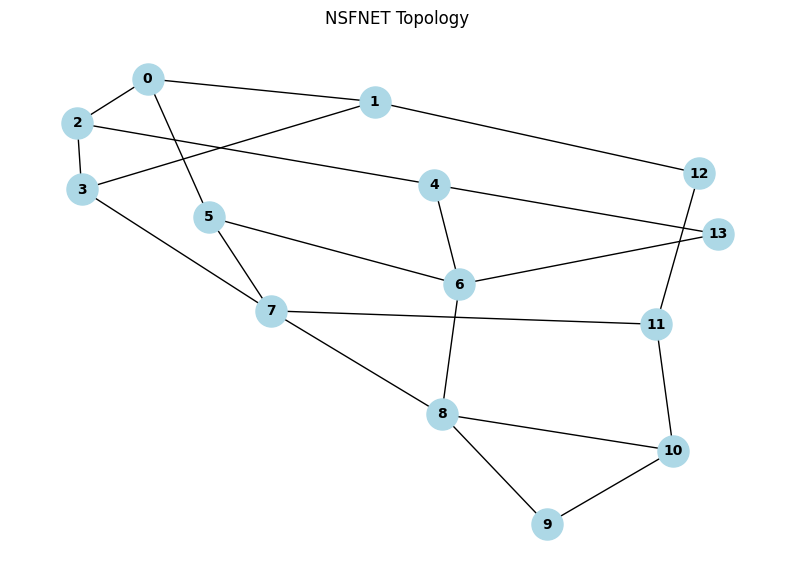

In [4]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_network_graph(env.graph, ax, title="NSFNET Topology")
plt.show()

### 5. Test the Environment with a Random Agent

We will run a single episode using random actions to see the environment in action and ensure the `reset` and `step` functions work together.

In [5]:
obs, info = env.reset()
terminated = False
total_reward = 0
step_count = 0

print(f"Initial Packet: Route from {obs['current_node']} to {obs['destination_node']}")

while not terminated and step_count < 50: # Add a step limit to prevent infinite loops
    action = env.action_space.sample()  # Choose a random action
    obs, reward, terminated, truncated, info = env.step(action)
    
    total_reward += reward
    step_count += 1
    
    print(f"Step {step_count}: Action={action} -> New Node={obs['current_node']}, Reward={reward:.2f}, Terminated={terminated}")

print("\n--- Episode Finished ---")
print(f"Final Path: {info.get('path')}")
print(f"Total Reward: {total_reward:.2f}")
print(f"Total Latency: {info.get('total_latency')}")

Initial Packet: Route from 10 to 2
Step 1: Action=3 -> New Node=10, Reward=-100.00, Terminated=True

--- Episode Finished ---
Final Path: None
Total Reward: -100.00
Total Latency: None


### 6. Official Gymnasium API Compliance Check

This is the most important validation step. `stable-baselines3` provides a tool that runs a suite of tests on a custom environment to ensure it behaves as expected. If this check passes, we can be confident our agent will train correctly.

In [6]:
print("Running environment checker...")
check_env(env)
print("\nSuccess! The environment is compliant with the Gymnasium API.")

Running environment checker...

Success! The environment is compliant with the Gymnasium API.
